In [21]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn import metrics #for checking the model accuracy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for plotting SVC
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC


In [22]:
# load iris dataset
iris = pd.read_csv("Iris.csv")
iris.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
# removing uneeded id column
iris.drop('Id', axis = 1, inplace = True)

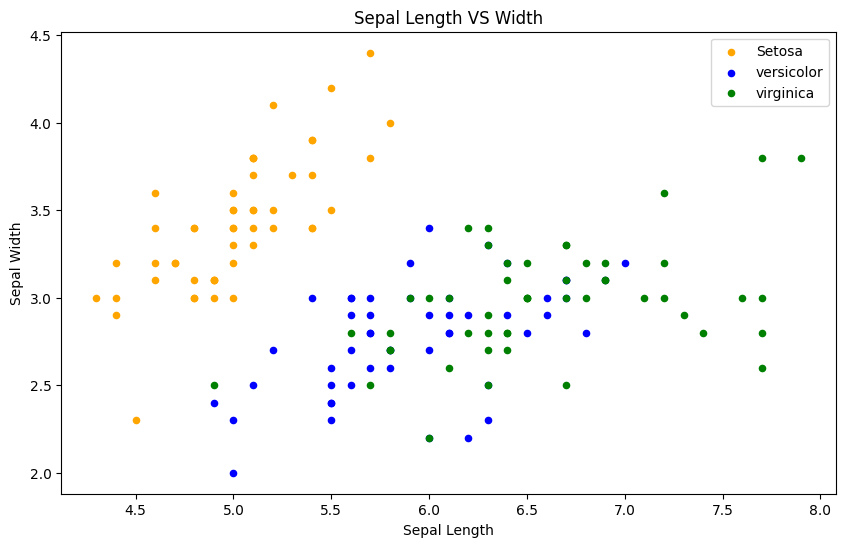

In [24]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

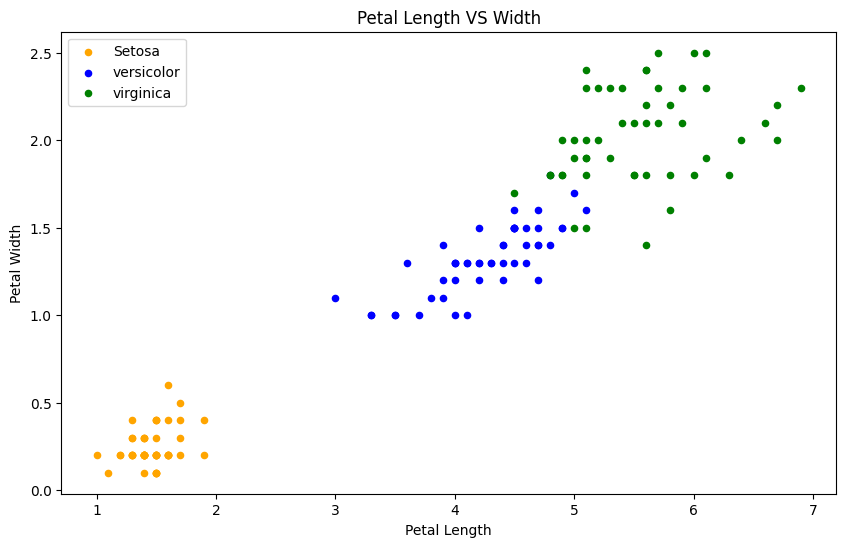

In [25]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

In [26]:
# using linear kernel as support vector classifier
X, y = make_classification(n_samples=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =0)
clf = svm.SVC(kernel = 'precomputed')
gram_train = np.dot(X_train, X_train.T) # using the linear kernel
clf.fit(gram_train, y_train)
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([0, 1, 0])

"\n# visualising distribution of data\niris.hist(color = 'black')\nfig=plt.gcf()\nfig.set_size_inches(12,6)\nplt.show()\n"

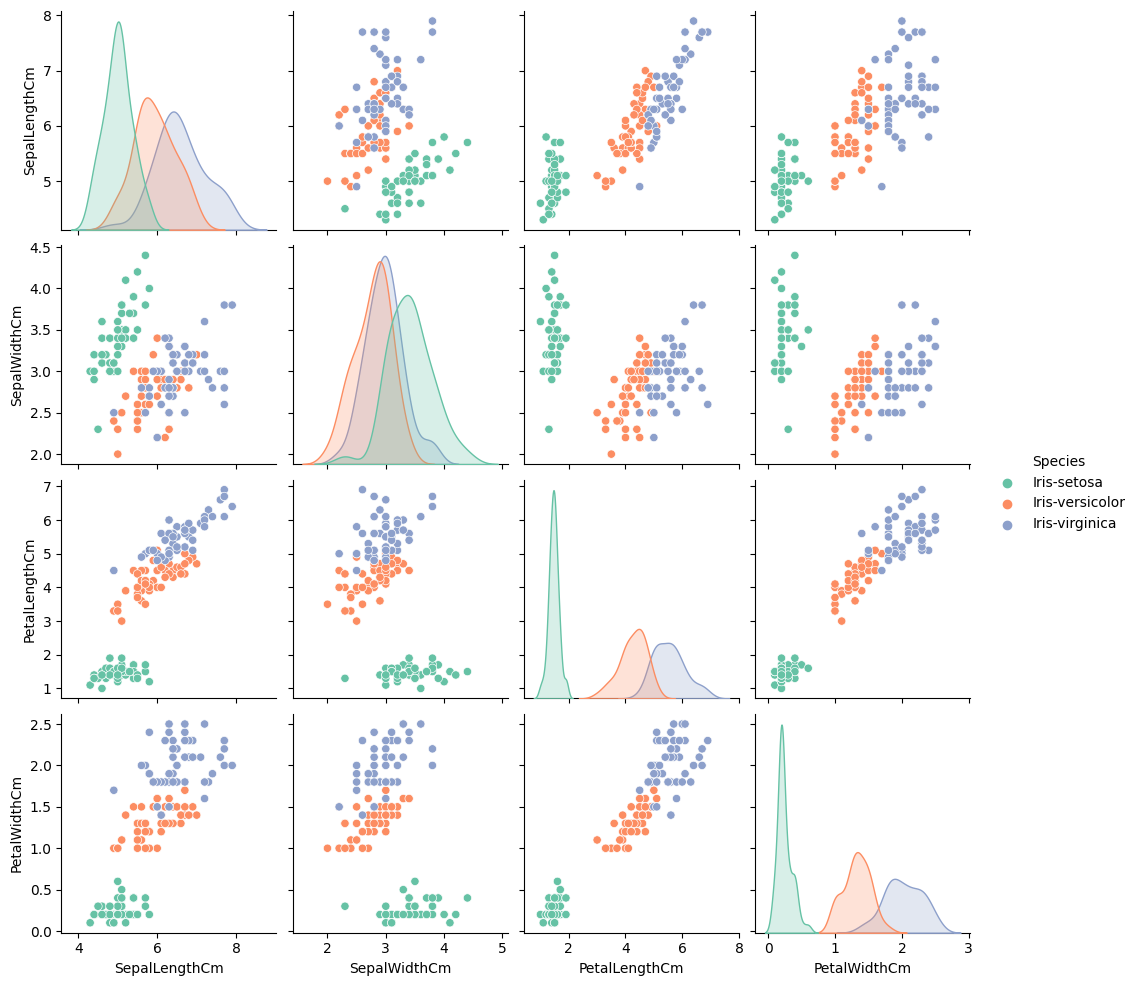

In [27]:
sns.pairplot(data=iris, hue = 'Species', palette='Set2')

"""
# visualising distribution of data
iris.hist(color = 'black')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
"""

In [28]:
# train test and split data
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)


In [29]:
display(x_test)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
3,4.6,3.1,1.5,0.2
133,6.3,2.8,5.1,1.5
107,7.3,2.9,6.3,1.8
46,5.1,3.8,1.6,0.2
146,6.3,2.5,5.0,1.9
71,6.1,2.8,4.0,1.3
78,6.0,2.9,4.5,1.5
59,5.2,2.7,3.9,1.4
56,6.3,3.3,4.7,1.6
51,6.4,3.2,4.5,1.5


In [30]:
display(y_test)

3          Iris-setosa
133     Iris-virginica
107     Iris-virginica
46         Iris-setosa
146     Iris-virginica
71     Iris-versicolor
78     Iris-versicolor
59     Iris-versicolor
56     Iris-versicolor
51     Iris-versicolor
43         Iris-setosa
5          Iris-setosa
141     Iris-virginica
17         Iris-setosa
28         Iris-setosa
25         Iris-setosa
81     Iris-versicolor
19         Iris-setosa
55     Iris-versicolor
69     Iris-versicolor
137     Iris-virginica
104     Iris-virginica
34         Iris-setosa
6          Iris-setosa
20         Iris-setosa
131     Iris-virginica
66     Iris-versicolor
4          Iris-setosa
140     Iris-virginica
16         Iris-setosa
148     Iris-virginica
135     Iris-virginica
130     Iris-virginica
12         Iris-setosa
29         Iris-setosa
84     Iris-versicolor
99     Iris-versicolor
94     Iris-versicolor
128     Iris-virginica
89     Iris-versicolor
147     Iris-virginica
58     Iris-versicolor
115     Iris-virginica
100     Iri

In [31]:
# logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
logistic_prediction=model.predict(x_test)


/Users/hughsignoriello/opt/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# support vector classifiers
SVM =SVC() # default: C = 1, kernel = linear
SVM.fit(x_train, y_train)

SVC()

In [33]:
# validate model with test
svc_pred=SVM.predict(x_test)

range of values:  3.3 8.9 1.0 5.4


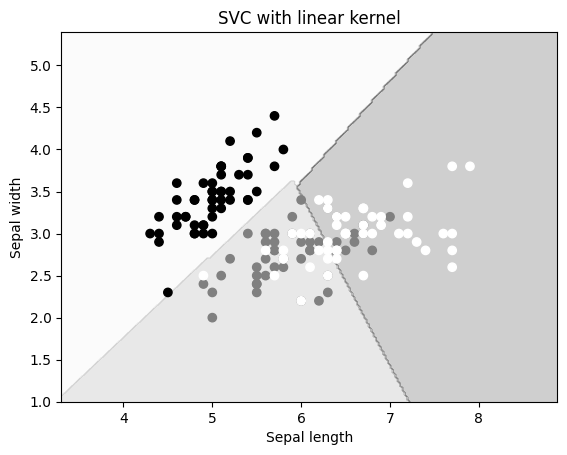

In [50]:
# Import some Data from the iris Data Set
iris = datasets.load_iris()
# display(iris)
# Take only the first two features of Data.
# To avoid the slicing, Two-Dim Dataset can be used
# sepal length and width in cm
# X = rows, y = columns
X = iris.data[:, :2] # [:, :2] get all rows and take the first 2 columns
y = iris.target # column heading

# C is the SVM regularization parameter
C = 1.0 
  
# Create an Instance of SVM and Fit out the data.
# Data is not scaled so as to be able to plot the support vectors
svc = svm.SVC(kernel ='linear', C = 1).fit(X, y)
  
# extract min and max values from dataset
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print("range of values: ", x_min, x_max, y_min, y_max)
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
         np.arange(y_min, y_max, h))

# print(xx, yy)
# Plot the data for Proper Visual Representation
plt.subplot(1, 1, 1)
  
# Predict the result by giving Data to the model
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha = 0.2, cmap = 'binary')
  
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'gist_gray')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
  
# Output the Plot
plt.show()

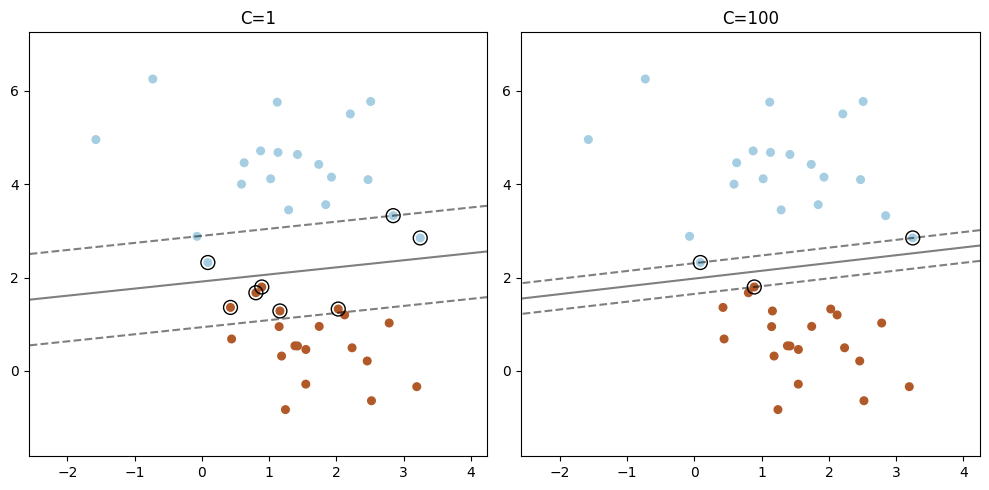

In [20]:

# dummy example plot
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()